In this notebook, I try to find a better notebook by using all the desirable properties, and interpolating a function over this. We design the function to be between 0 and 1 (should be used on abs(b_hat - b)).
- f(0) = 0
- f(1) = 1
- concave between 0 and 0.5
- convex between 0.5 and 1
- at least C1-continuous
- f'(0) > 0
- f'(0) > f'(1)
- f(x) approx. 1 if x > 0.6

We try to approximate this with 2 cubic splines. Below we solve the SLE.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
f_prime_0 = 1.0
f_prime_1 = 1.0
f_0_5 = 0.5
f_prime_0_5 = 6.0

In [13]:
# first spline
# f(0) = 0
# f(0.5) = f_0_5
# f'(0) = f_prime_0
# f'(0.5) = f_prime_0_5
a0 = [0, 0, 0, 1]
a1 = [0.5**3, 0.5**2, 0.5, 1]
a2 = [0, 0, 1, 0]
a3 = [3 * 0.5**2, 2 * 0.5, 1, 0]
b = [0, f_0_5, f_prime_0, f_prime_0_5]
coeffs_1 = np.linalg.solve([a0, a1, a2, a3], b)

# second spline
# f(0.5) = f_0_5
# f(1) = 1
# f'(0.5) = f_prime_0_5
# f'(1) = f_prime_1
a0 = [0.5**3, 0.5**2, 0.5, 1]
a1 = [1, 1, 1, 1]
a2 = [3 * 0.5**2, 2 * 0.5, 1, 0]
a3 = [3, 2, 1, 0]
b = [f_0_5, 1, f_prime_0_5, f_prime_1]
coeffs_2 = np.linalg.solve([a0, a1, a2, a3], b)

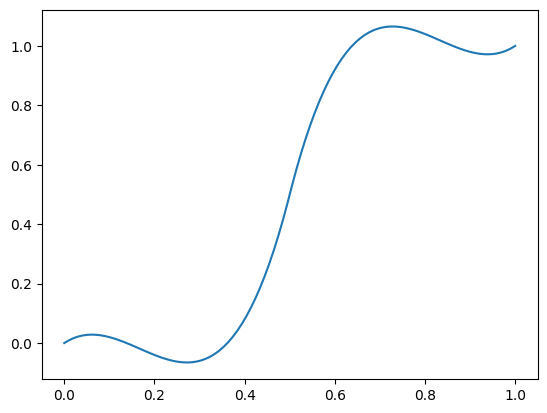

In [14]:
# plot splines between 0 and 1
x = np.linspace(0, 1, 100)
y = []
for x_i in x:
    if x_i < 0.5:
        y.append(np.polyval(coeffs_1, x_i))
    else:
        y.append(np.polyval(coeffs_2, x_i))
plt.plot(x, y)
plt.show()

As we see, this function is not monotone. Hence, we should use something like this algorithm:
[Monotone_cubic_interpolation](https://en.wikipedia.org/wiki/Monotone_cubic_interpolation)

Another option would be to e.g. use a quadratic function which hits 1 at 0.6

In [30]:
x1 = 0.6
f_prime_0 = 0.1

In [31]:
coeffs = np.array([1/(x1*x1) - f_prime_0/x1, f_prime_0, 0])

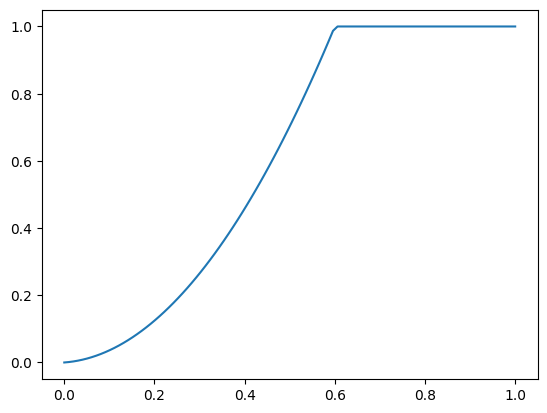

In [32]:
# plot splines between 0 and 1
x = np.linspace(0, 1, 100)
y = []
for x_i in x:
    if x_i < x1:
        y.append(np.polyval(coeffs, x_i))
    else:
        y.append(1.0)
plt.plot(x, y)
plt.show()

In [ ]:
# TODO in whole notebook: use numpy.polynomial.polynomial.Polynomial instead of np.polyval